In [1]:
#numpy, pandas, matplotlib, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#PyTorch and its sub modules
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch import nn


In [2]:
Current_Directory=os.getcwd()
Image_Directory=os.path.join(Current_Directory, "data/", "data")
Image_Directory

'/Users/zhushenhuiyi/Downloads/-Math_108C-Final-Project/data/data'

In [3]:
train_transform=transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()])
dataloader=DataLoader(dataset=torchvision.datasets.ImageFolder(os.path.join(Current_Directory, "data/"), transform=train_transform), batch_size=64)

In [4]:
all_features=[]
flag=1
for train_features, train_labels in dataloader:
    all_features.append(train_features)
    
    if flag==1:
        print(f"Feature batch shape: {train_features.shape}")
        flag=0

all_features=torch.cat(all_features, dim=0)
all_features.shape

Feature batch shape: torch.Size([64, 1, 218, 178])


torch.Size([5000, 1, 218, 178])

In [14]:
# turn tensor into matrix
mymat = np.asarray(all_features[0,:])

In [16]:
mean_mat = np.mean(mymat)

In [17]:
mean_mat

0.5768056

In [18]:
centered_mat = mymat - mean_mat

In [19]:
centered_mat

array([[[ 0.3369199 ,  0.3369199 ,  0.3369199 , ...,  0.33299834,
          0.36829245,  0.36829245],
        [ 0.3369199 ,  0.3369199 ,  0.3369199 , ...,  0.34084147,
          0.36829245,  0.36829245],
        [ 0.3369199 ,  0.3369199 ,  0.3369199 , ...,  0.3486846 ,
          0.37221402,  0.37221402],
        ...,
        [-0.23170754, -0.32974678, -0.2120997 , ..., -0.29445264,
         -0.29053107, -0.29053107],
        [-0.2748448 , -0.24347225, -0.13366833, ..., -0.31798205,
         -0.3101389 , -0.3101389 ],
        [-0.1258252 ,  0.0153513 ,  0.1761356 , ..., -0.31798205,
         -0.3101389 , -0.3101389 ]]], dtype=float32)

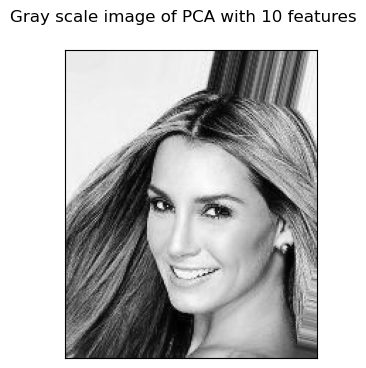

In [20]:
plt.figure(figsize=((6,4)))
plt.suptitle("Gray scale image of PCA with 10 features")
plt.xticks(())
plt.yticks(())
plt.imshow(centered_mat.squeeze(), cmap="gray")

In [30]:
# perform svd centered data
U,S,Vt = np.linalg.svd(centered_mat.squeeze())

In [35]:
# V10T = Basis of eigenspace
first_10_rows = Vt[:10, :]
# Transpose the first 10 rows
transpose_of_first_10_rows = first_10_rows.T
#For projection
result = centered_mat @ transpose_of_first_10_rows @ transpose_of_first_10_rows.T

In [36]:
result.shape

(1, 218, 178)

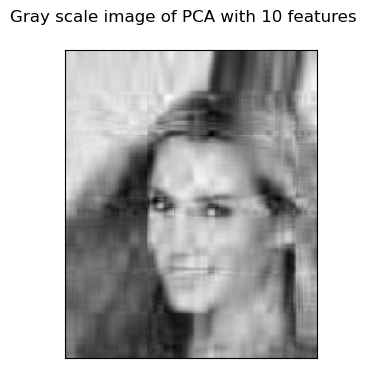

In [38]:
plt.figure(figsize=((6,4)))
plt.suptitle("Gray scale image of PCA with 10 features")
plt.xticks(())
plt.yticks(())
plt.imshow(result.squeeze(), cmap="gray")